<a href="https://colab.research.google.com/github/sans1012/EDA_Netflix-Data/blob/main/Tathastu_ML_%26_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: EDA on Netflix Dataset
By- Sanskriti Jain

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## EDA

In [10]:
df_movies=df[df['type']=="Movie"]
df_show=df[df['type']=="TV Show"]

In [11]:
df_movies=df_movies.dropna(subset = ['duration'])
df_movies['duration']=df_movies['duration'].str.replace(' min','')
df_movies['duration']=df_movies['duration'].astype(int)


In [12]:
df_show=df_show.dropna(subset = ['duration'])
df_show['no_of_seasons']=df_show['duration'].str.replace(' Season','')
df_show['no_of_seasons']=df_show['no_of_seasons'].str.replace('s','')
df_show['no_of_seasons']=df_show['no_of_seasons'].astype(int)

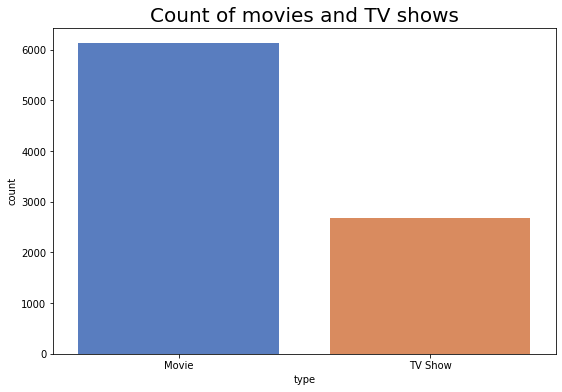

In [13]:
plt.figure(figsize=(9,6))
sns.countplot(df["type"], palette='muted')
plt.title("Count of movies and TV shows",fontsize=20)
plt.show()

### Maximum people like to watch movie on Netflix.

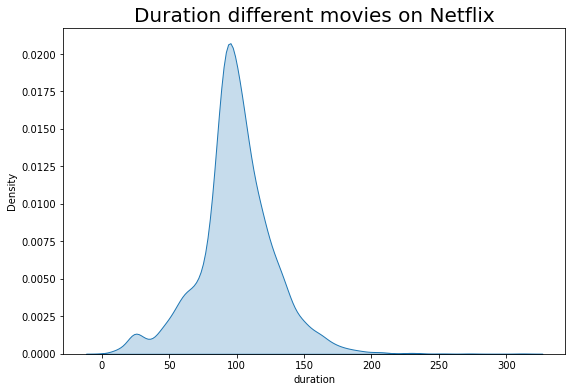

In [14]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=df_movies['duration'], shade=True)
plt.title("Duration different movies on Netflix",fontsize=20)
plt.show()

### The median duration of a show is around 100 minutes

In [15]:
tv = df_show.sort_values(by='no_of_seasons', ascending=False)[:30]
fig = px.bar(tv, x='title', y='no_of_seasons', hover_data=['release_year', 'rating'],color='no_of_seasons',
             title="Count of different season of TV shows on Netflix", width=1000, height=600)
fig.show()

### Grey's Anatomy is the show with maximun seasons on netflix.There are many shows with 10 seasons

In [16]:
px.histogram(df, x = "release_year", color = "release_year", title="Count of release years",width=1000, height=400)

### Ever since launch of Netfilx, highest count of release of movies and TV shows on Netfix was in year 2019

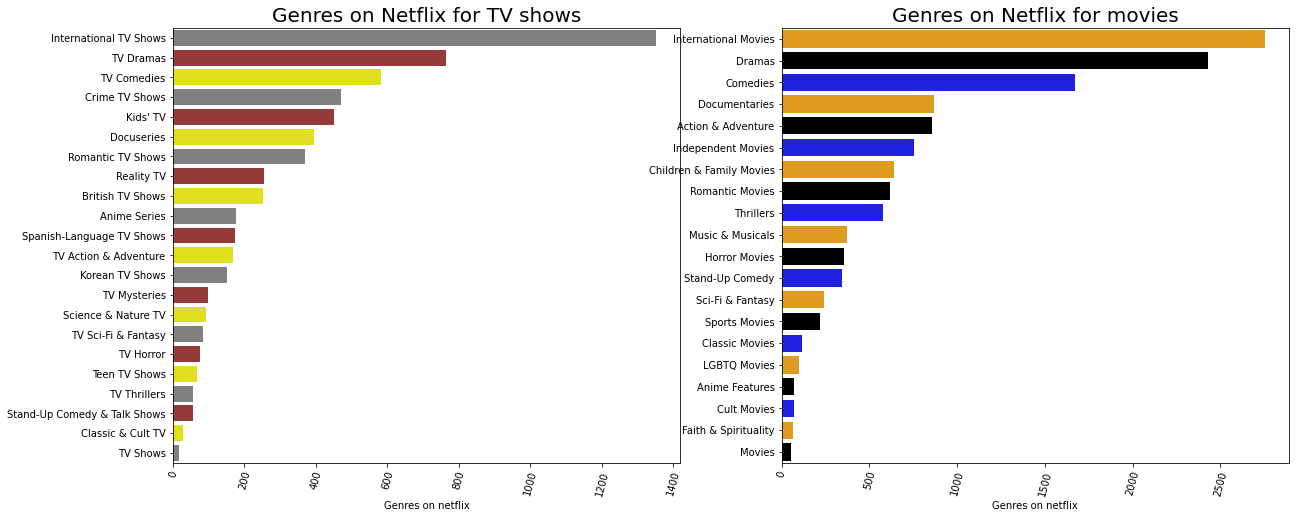

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
genres=df_show.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
gen=sns.countplot(y=genres,order=genres.value_counts().index[:23],palette=['Gray','Brown',"Yellow"])
plt.xlabel("Genres on netflix",fontsize=10)
plt.xticks(rotation=75)
plt.title('Genres on Netflix for TV shows', fontsize=20)


plt.subplot(1,2,2)
genres=df_movies.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
gen=sns.countplot(y=genres,order=genres.value_counts().index[:23],palette=["orange","black",'blue'])
plt.xticks(rotation=75)
plt.xlabel("Genres on netflix",fontsize=10)
plt.title('Genres on Netflix for movies', fontsize=20)
plt.xticks(rotation=75)
plt.show()

### There are many international TV shows on netfix along with Drama and comedies even in both TV and Movies

In [18]:
df_rating = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(df_rating, values='counts', names='rating',title='Distribution of Rating on Netflix')
pieChart.show()

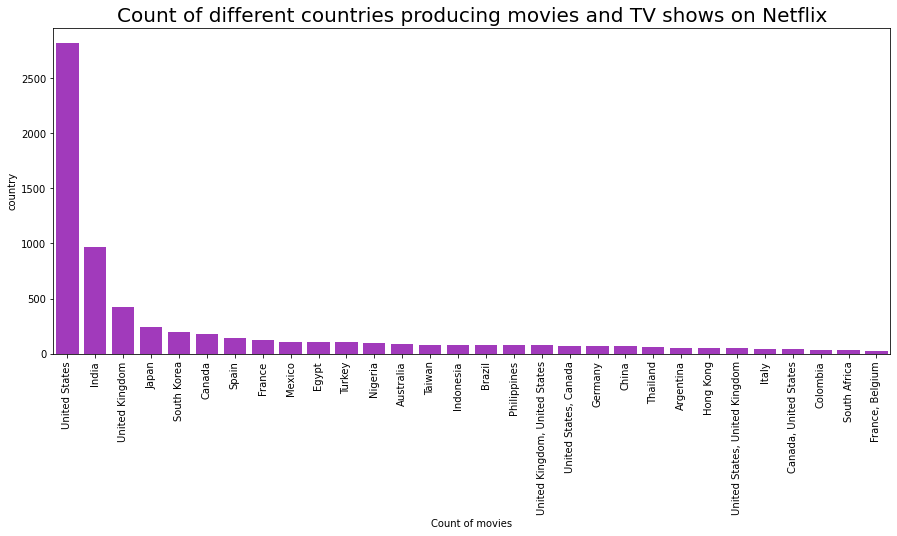

In [19]:
plt.figure(figsize = (15, 6))
sns.barplot(y = df["country"].value_counts()[:30], x = df["country"].value_counts()[:30].index, palette = ['#ae24d1'])
plt.xlabel("Count of movies")
plt.title("Count of different countries producing movies and TV shows on Netflix",fontsize=20)
plt.xticks(rotation=90)
plt.show()

### US and India are the countries producing the highest number of content on netflix

# THE END